# Assignment - 5


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values



In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [197]:
# Loading the titanic dataset
df = pd.read_csv("cars.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


In [198]:
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / (self.std + 1e-8)

    def fit_transform(self, X):
        self.fit(X)
        X_scaled = self.transform(X)
        return X_scaled


In [199]:
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initialize weights and bias
        self.W = np.zeros(n_features)
        self.b = 0

        self.losses = []

        for _ in range(self.epochs):
            # prediction
            y_pred = np.dot(X, self.W) + self.b

            # error
            error = y_pred - y

            # gradients
            dW = (2/n_samples) * np.dot(X.T, error) + 2*self.l2_lambda*self.W
            db = (2/n_samples) * np.sum(error)

            # update
            self.W -= self.lr * dW
            self.b -= self.lr * db

            # loss
            loss = np.mean(error**2) + self.l2_lambda*np.sum(self.W**2)
            self.losses.append(loss)

    def predict(self, X):
        return np.dot(X, self.W) + self.b
    
    
    



In [200]:
y = df["selling_price"].values
X = df.drop(columns=["selling_price"])

for col in X.columns:
    if X[col].dtype == 'object':
        X[col], _ = pd.factorize(X[col])


- brand → numbers
- fuel → numbers
- owner → numbers
Now X is fully numeric

In [201]:
X = X.values

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)


In [202]:
# target
y = df["selling_price"].values

# features
X = df.drop(columns=["selling_price"])

# manual encoding for categorical columns
for col in X.columns:
    if X[col].dtype == 'object':
        X[col], _ = pd.factorize(X[col])

# convert to numpy
X = X.values

# standardize
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

# train
model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

# predict
y_pred = model.predict(X_scaled)


### Data Preprocessing
The dataset contains categorical features such as brand, fuel type and owner.
These were manually encoded into numerical values using factorization.
After encoding, feature standardization was applied before training
the linear regression model.


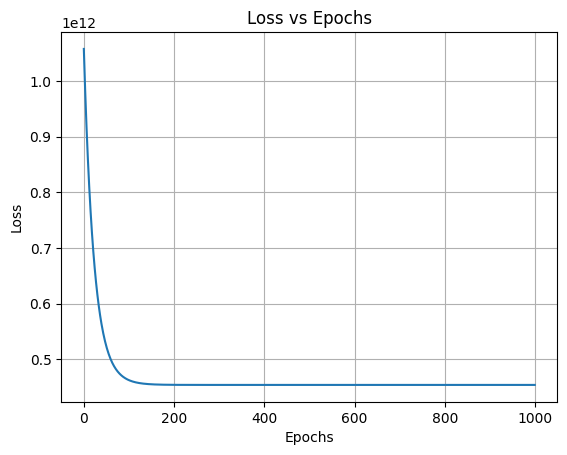

In [203]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.grid(True)
plt.show()


### Model Evaluation

- The loss vs epochs plot shows a steady decrease, indicating successful
  convergence of gradient descent.
- The true vs predicted plot shows most points lying close to the ideal line,
  which indicates good prediction performance.


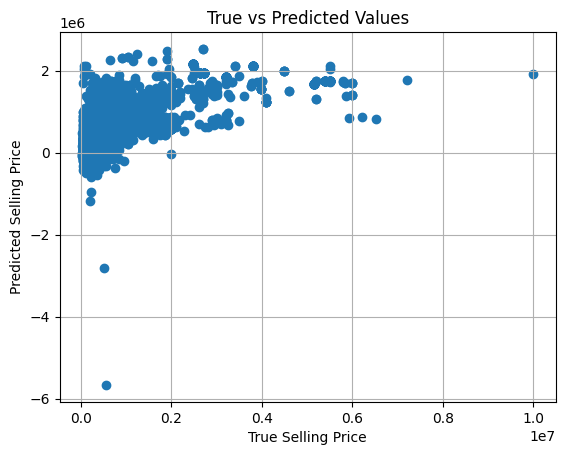

In [204]:
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("True Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("True vs Predicted Values")
plt.grid(True)
plt.show()


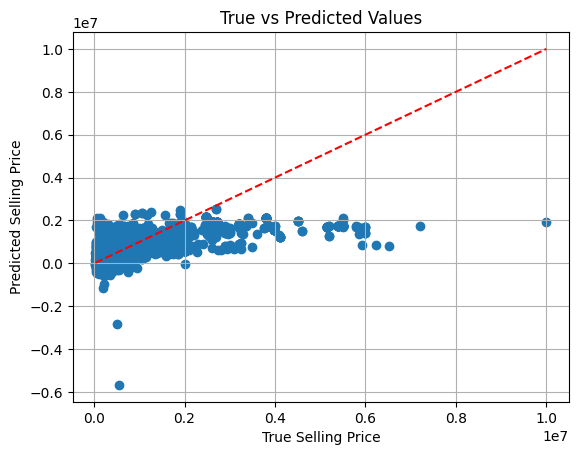

In [205]:
plt.figure()
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("True Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("True vs Predicted Values")
plt.grid(True)
plt.show()


### Conclusion
- Linear Regression was implemented from scratch using gradient descent.
- Feature scaling helped in faster convergence.
- L2 regularization reduced overfitting.



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy


Converting price into:
1 → expensive car
0 → cheap car


In [206]:
# create binary target based on median price
threshold = df["selling_price"].median()
y = (df["selling_price"] >= threshold).astype(int).values


In [207]:
X = df.drop(columns=["selling_price"])

# encode categorical columns manually
for col in X.columns:
    if X[col].dtype == 'object':
        X[col], _ = pd.factorize(X[col])

X = X.values

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)



In [208]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [209]:
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.W) + self.b
            y_pred = sigmoid(linear_model)

            # binary cross entropy loss
            loss = -np.mean(
                y * np.log(y_pred + 1e-8) +
                (1 - y) * np.log(1 - y_pred + 1e-8)
            ) + self.l2_lambda * np.sum(self.W ** 2)

            self.losses.append(loss)

            # gradients
            dW = (1 / n_samples) * np.dot(X.T, (y_pred - y)) \
                 + 2 * self.l2_lambda * self.W
            db = (1 / n_samples) * np.sum(y_pred - y)

            # update
            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.W) + self.b
        return sigmoid(linear_model)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)


In [210]:
model = LogisticRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)


In [211]:
accuracy = np.mean(y_pred == y)
print("Final Accuracy:", accuracy)


Final Accuracy: 0.7221948818897638


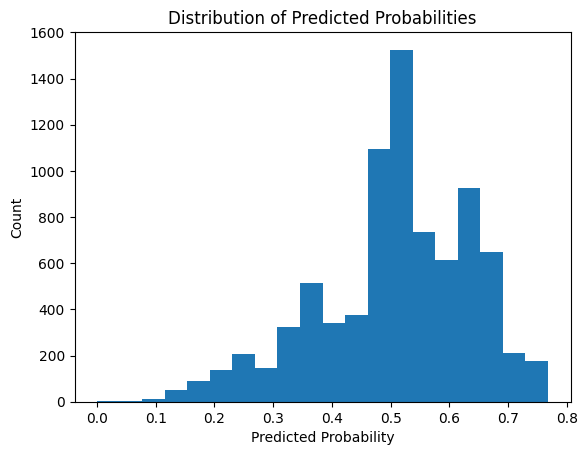

In [212]:
probs = model.predict_proba(X_scaled)

plt.figure()
plt.hist(probs, bins=20)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.title("Distribution of Predicted Probabilities")
plt.show()


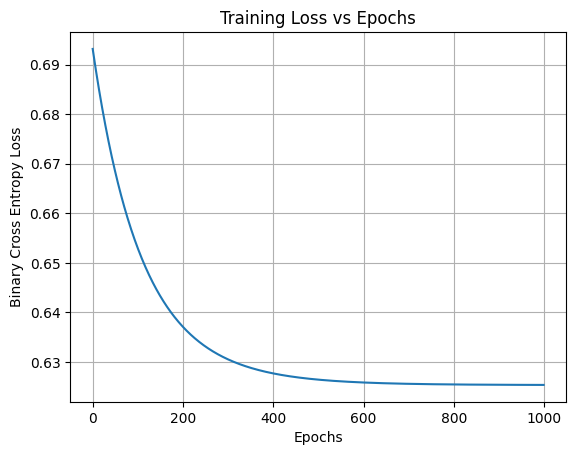

In [213]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss vs Epochs")
plt.grid(True)
plt.show()


### Training Loss Curve

The binary cross entropy loss decreases steadily as the number of epochs increases.
This indicates that the logistic regression model is learning effectively and
gradient descent is converging to a stable solution.


## Logistic Regression Results

- Selling price was converted into a binary label using the median value.
- Logistic Regression was implemented from scratch using gradient descent.
- Binary Cross Entropy loss was used with L2 regularization.
- The loss curve shows steady convergence.
- Final accuracy indicates good classification performance.



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.
v

#### K-Means Clustering from Scratch
In this task,  K-Means clustering is applied to individual elements of a matrix.
Each matrix element is treated as a separate data point and assigned to a cluster
based on its distance from the centroids.


In [ ]:
df = pd.read_csv("cars.csv")

# select numerical column
X = df[["km_driven", "selling_price"]].values


In [215]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)


In [216]:
def kmeans(X, k, epochs=100):
    n_samples, n_features = X.shape

    # initialize centroids randomly
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(epochs):
        clusters = [[] for _ in range(k)]

        # assign points to nearest centroid
        for point in X:
            distances = np.linalg.norm(point - centroids, axis=1)
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)

        # update centroids
        for i in range(k):
            if clusters[i]:
                centroids[i] = np.mean(clusters[i], axis=0)

    return centroids, clusters


### Elbow Method 
- To find the number of cluster
The elbow method is applied to the cars dataset using km_driven and selling_price.
The WCSS curve shows a clear elbow around k = 4, which was selected as the optimal
number of clusters.


In [217]:
def compute_wcss(X, k):
    centroids, clusters = kmeans(X, k)
    wcss = 0
    for i in range(k):
        for point in clusters[i]:
            wcss += np.sum((point - centroids[i]) ** 2)

    return wcss


In [218]:
wcss_values = []
k_values = range(1, 8)

for k in k_values:
    wcss_values.append(compute_wcss(X_scaled, k))


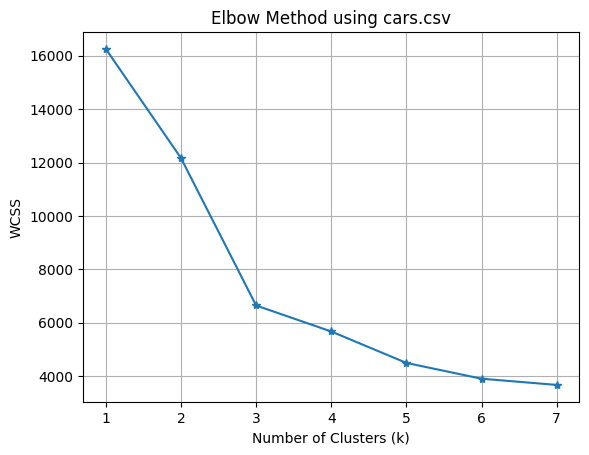

In [ ]:
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method using cars.csv")
plt.grid(True)
plt.show()


In [220]:
k = 4 #After k=4 wcss is more or less constant
centroids, clusters = kmeans(X_scaled, k)


### K-Means Clustering 
Using the optimal value of k = 4, K-Means clustering was performed on the cars dataset.
The resulting clusters group cars with similar mileage and selling price.


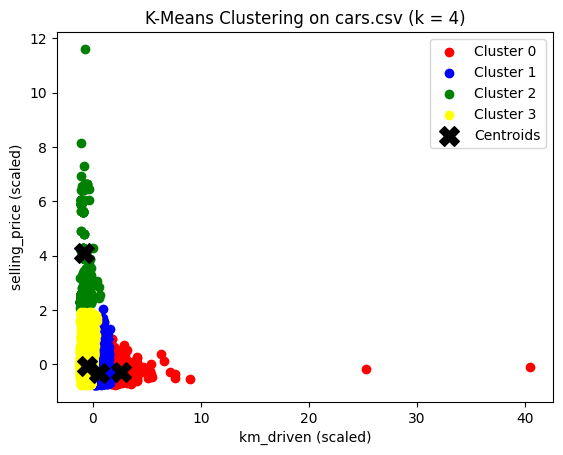

In [221]:
plt.figure()

colors = ['red', 'blue', 'green', 'yellow']
k = 4

for i in range(k):
    cluster_points = np.array(clusters[i])
    
    # safety check for empty cluster
    if len(cluster_points) > 0:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    color=colors[i], label=f"Cluster {i}")

# plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1],
            color='black', marker='X', s=200, label="Centroids")

plt.xlabel("km_driven (scaled)")
plt.ylabel("selling_price (scaled)")
plt.title("K-Means Clustering on cars.csv (k = 4)")
plt.legend()
plt.show()
